# Práctica 2: Aprendizaje automático

__Fecha de entrega: 27 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 20__

__Nombres de los estudiantes: Alejandro Barrachina Argudo y Juan Pablo Corella Martín__

In [41]:
RANDOM_STATE = 1

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene dolor lumbar o no.

Las variables del conjunto de datos son las siguientes: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope.

Crea un dataframe a partir del fichero `lower_back_pain_dataset2.csv` que se proporciona junto con la práctica.



In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv("./lower_back_pain_dataset2.csv", index_col=0)

df.dropna(inplace=True) #Nos cargamos las que tengan datos incompletos
df

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
pelvic_incidence,,,,,,,,,,,,
63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal


In [43]:
df = df.reset_index() #queremos que pelvic incidence sea una columna
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables con la variable `Class_att`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las variables numéricas con mayor correlación con la variable `Class_att`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. ¿Hay pares de variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [44]:
df.groupby('Class_att').size()

Class_att
Abnormal    210
Normal      100
dtype: int64

Dos tercios de los datos son 'Abnormal', cosa que puede llegar a influir en los resultados tendiendo a predecir más este valor.

In [45]:
noCateg = df.copy()

noCateg[["Class_att"]] = noCateg[["Class_att"]].apply(lambda x: x.factorize()[0])
corr = noCateg.corr()
corr = corr[abs(corr["Class_att"])>0.2]["Class_att"]
corr
# .corr() #convertimos los strings en valores numericos

# relacionadas = relacionadas[abs(relacionadas["Class_att"])>0.5]["Class_att"] #filtramos la correlacion por valor absoluto mayor que 0.5

# relacionadas

pelvic_incidence           -0.353336
pelvic_tilt                -0.326063
lumbar_lordosis_angle      -0.312484
sacral_slope               -0.210602
pelvic_radius               0.309857
degree_spondylolisthesis   -0.443687
Class_att                   1.000000
Name: Class_att, dtype: float64

La variable que más influye en la objetivo es 'degree_spondylolisthesis'.

array([[<Axes: xlabel='pelvic_incidence', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_tilt', ylabel='pelvic_incidence'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_incidence'>,
        <Axes: xlabel='sacral_slope', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_radius', ylabel='pelvic_incidence'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_slope', ylabel='pelvic_incidence'>,
        <Axes: xlabel='Direct_tilt', ylabel='pelvic_incidence'>,
        <Axes: xlabel='thoracic_slope', ylabel='pelvic_incidence'>,
        <Axes: xlabel='cervical_tilt', ylabel='pelvic_incidence'>,
        <Axes: xlabel='sacrum_angle', ylabel='pelvic_incidence'>,
        <Axes: xlabel='scoliosis_slope', ylabel='pelvic_incidence'>],
       [<Axes: xlabel='pelvic_incidence', ylabel='pelvic_tilt'>,
        <Axes: xlabel='pelvic_tilt', ylabel='pelvic_tilt'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabe

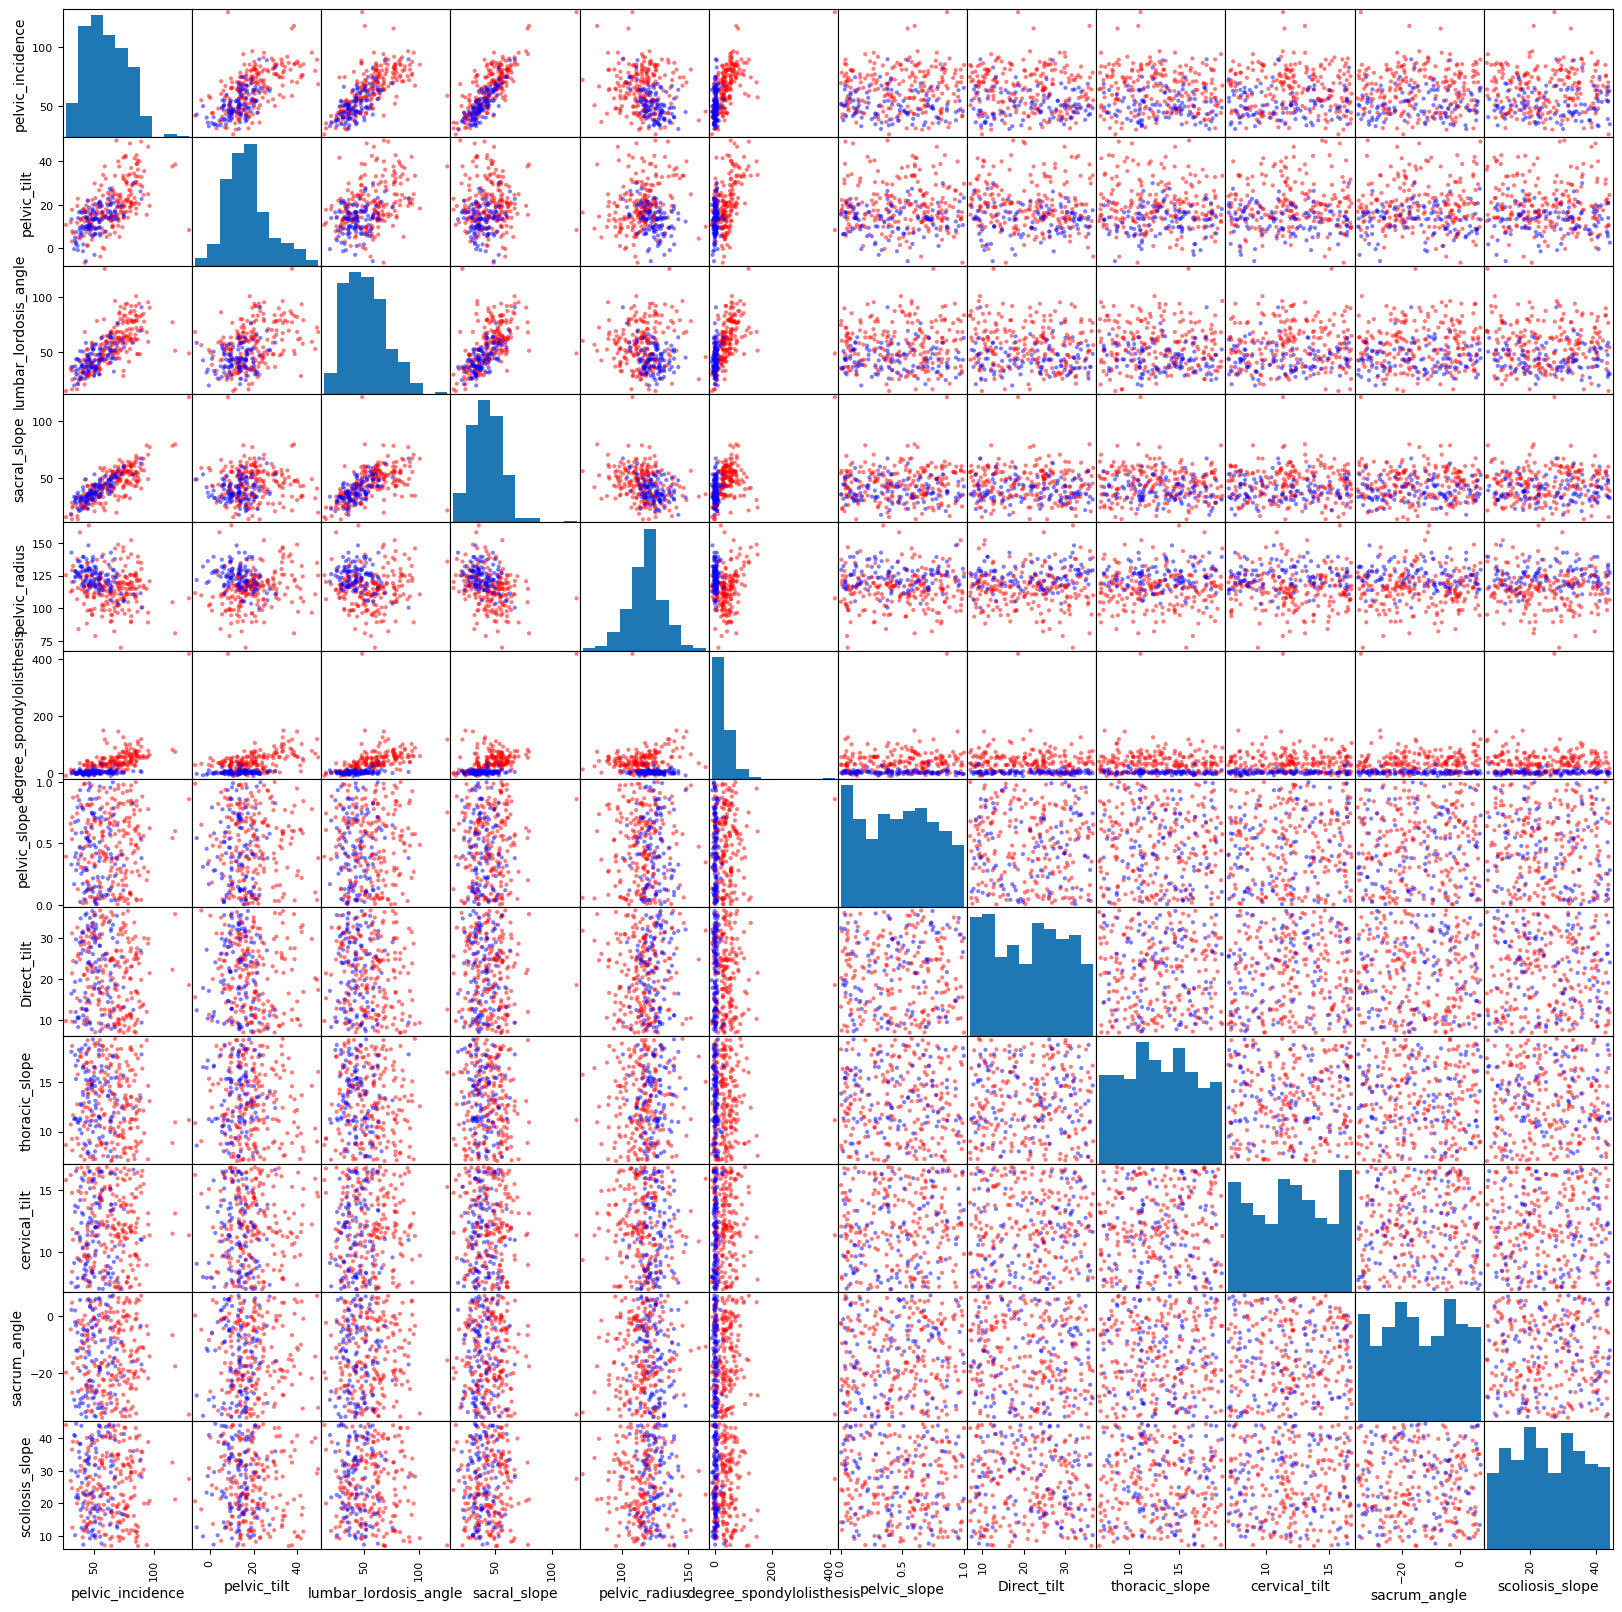

In [46]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = {'Abnormal': 'red', 'Normal': 'blue'}
colors = df['Class_att'].map(dic_colors)

scatter_matrix(df, figsize=(20,20), diagonal='hist', c=colors)


Las gráficas nos muestran que las seis variables devueltas en la correlación son las más relacionadas con la misma (forman grupos más marcados). También observamos que para 'Normal' los valores de 'degree_spondylolisthesis' son los más bajos de todos, teniendo un límite muy marcado con cualquier otra variable. Si la distribución de 'degree_spondylolisthesis' fuera normal, o más seguro es que la de 'Class_att' también lo fuese.

## 3) Árboles de decisión

Aplica árboles de decisión para resolver el problema



### 3.1) Normalización de los datos

Decide razonadamente si es necesario escalar o estandarizar los datos.

Tal y como funcionan los arboles de decision, no creemos necesario la normalización de los datos, ya que las probabilidades a la hora de escoger un camino u otro serán las mismas en ambos casos, pero con unos valores más proporcionales.

### 3.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos

df_data = df.drop(columns=["Class_att"], axis=1).to_numpy()
df_target = df["Class_att"].to_numpy()

data_cols = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
            'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
            'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
            'sacrum_angle', 'scoliosis_slope']

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.3, random_state=RANDOM_STATE)
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)

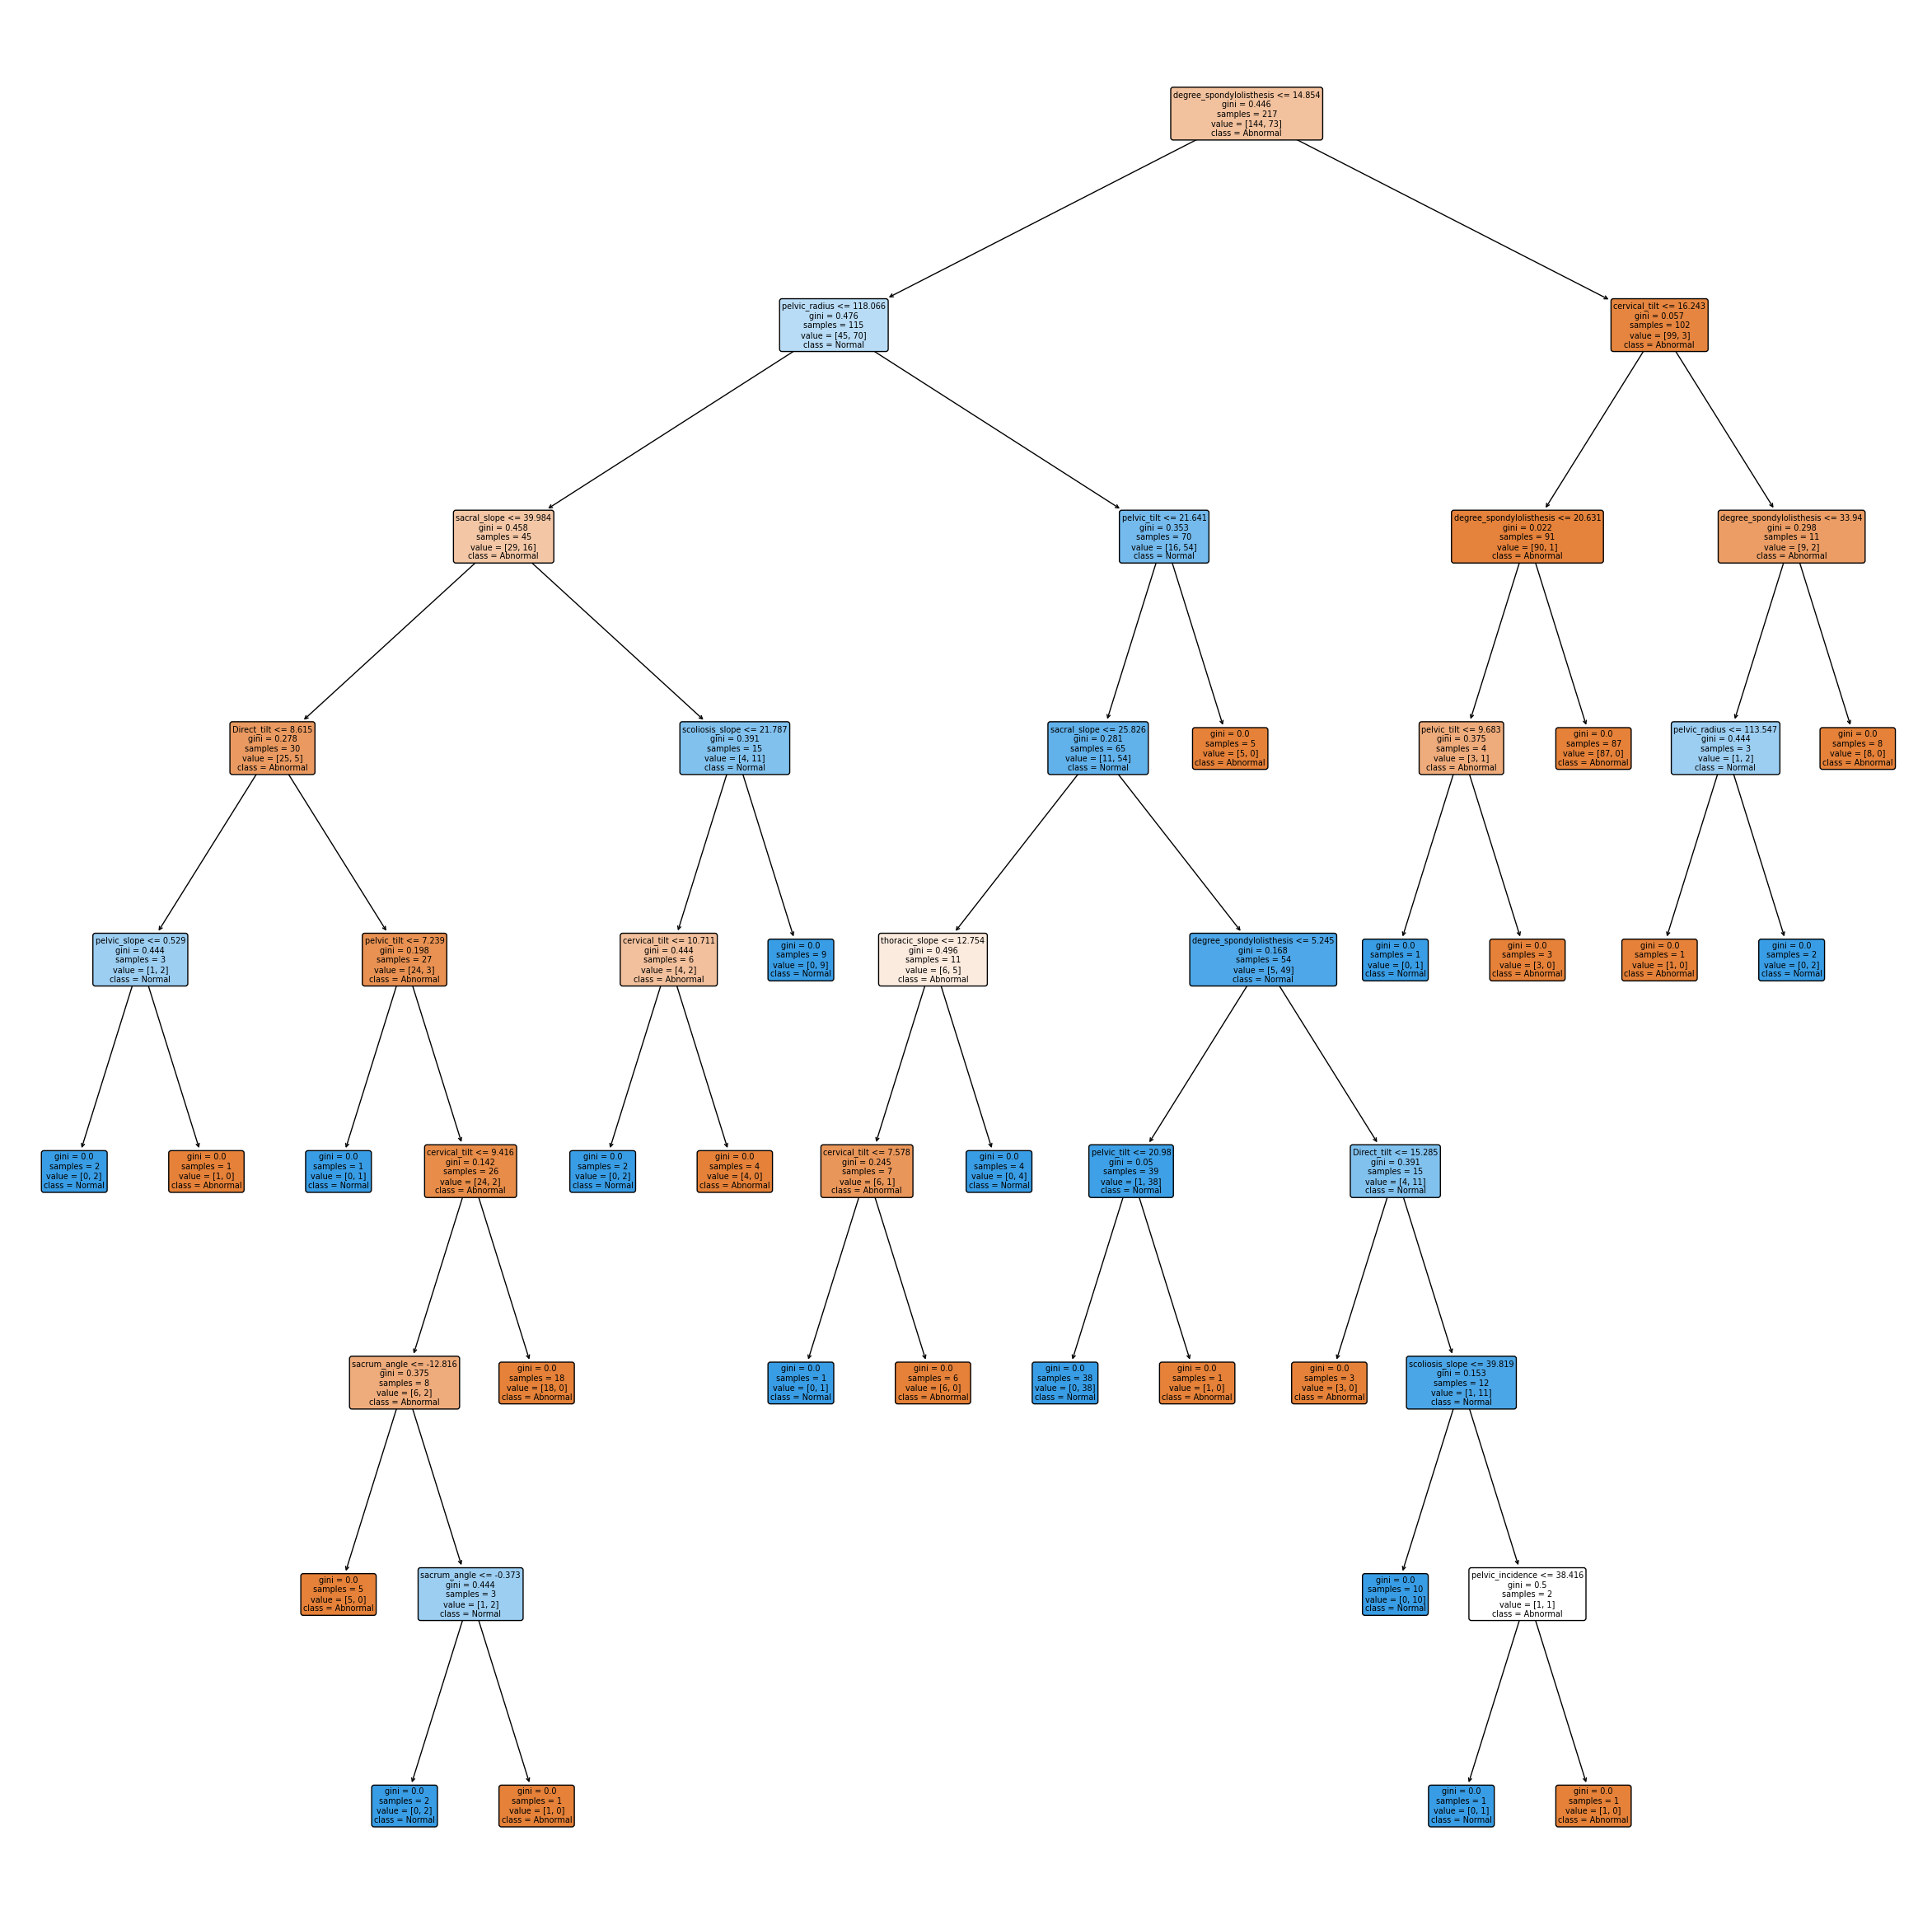

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(30,30))
plot_tree(clf, filled=True, feature_names=data_cols, class_names=["Abnormal", "Normal"], rounded=True, fontsize=7)
plt.show()

In [49]:
scores = cross_validate(clf, df_data, df_target, scoring='accuracy', 
                        cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(1.0, 0.7548387096774193)

Por defecto conseguimos un 100% de acierto en los casos de entrenamiento (al no estar limitado en profundidad) y un 75.5% en los de prueba, lo que nos indica que quizá se pueden mejorar los resultados.

In [50]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 15)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, df_data, df_target, scoring='accuracy', cv=10, return_train_score=True)
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.778494623655914,
  0.8179211469534049,
  0.8616487455197133,
  0.9003584229390682,
  0.9225806451612903,
  0.9473118279569894,
  0.9637992831541219,
  0.9724014336917562,
  0.9799283154121865,
  0.9885304659498209,
  0.9935483870967741,
  0.996415770609319,
  0.9992831541218639,
  1.0],
 [0.7709677419354839,
  0.6548387096774194,
  0.7419354838709677,
  0.735483870967742,
  0.7709677419354838,
  0.7516129032258064,
  0.767741935483871,
  0.7483870967741936,
  0.7612903225806451,
  0.7451612903225806,
  0.7483870967741935,
  0.7483870967741935,
  0.7483870967741935,
  0.7516129032258065])

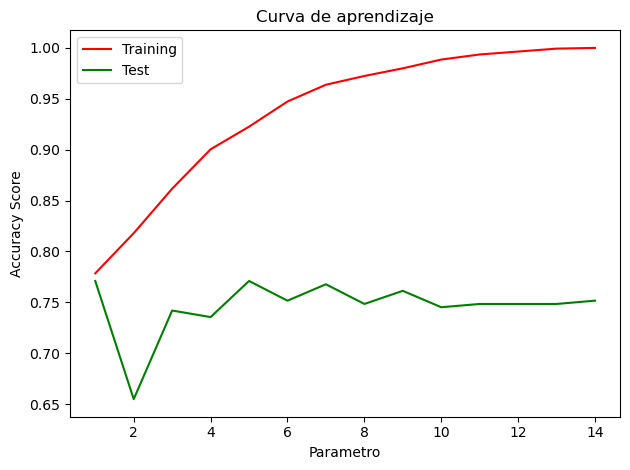

In [51]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

En este caso, al probar con distintas profundidades, sacamos como conclusión que la mejor profundidad es a nivel 5, ya que obligamos al árbol a generalizar sin que retenga los mismos datos siempre (aunque tampoco lo haga demasiado).

### 3.3) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.


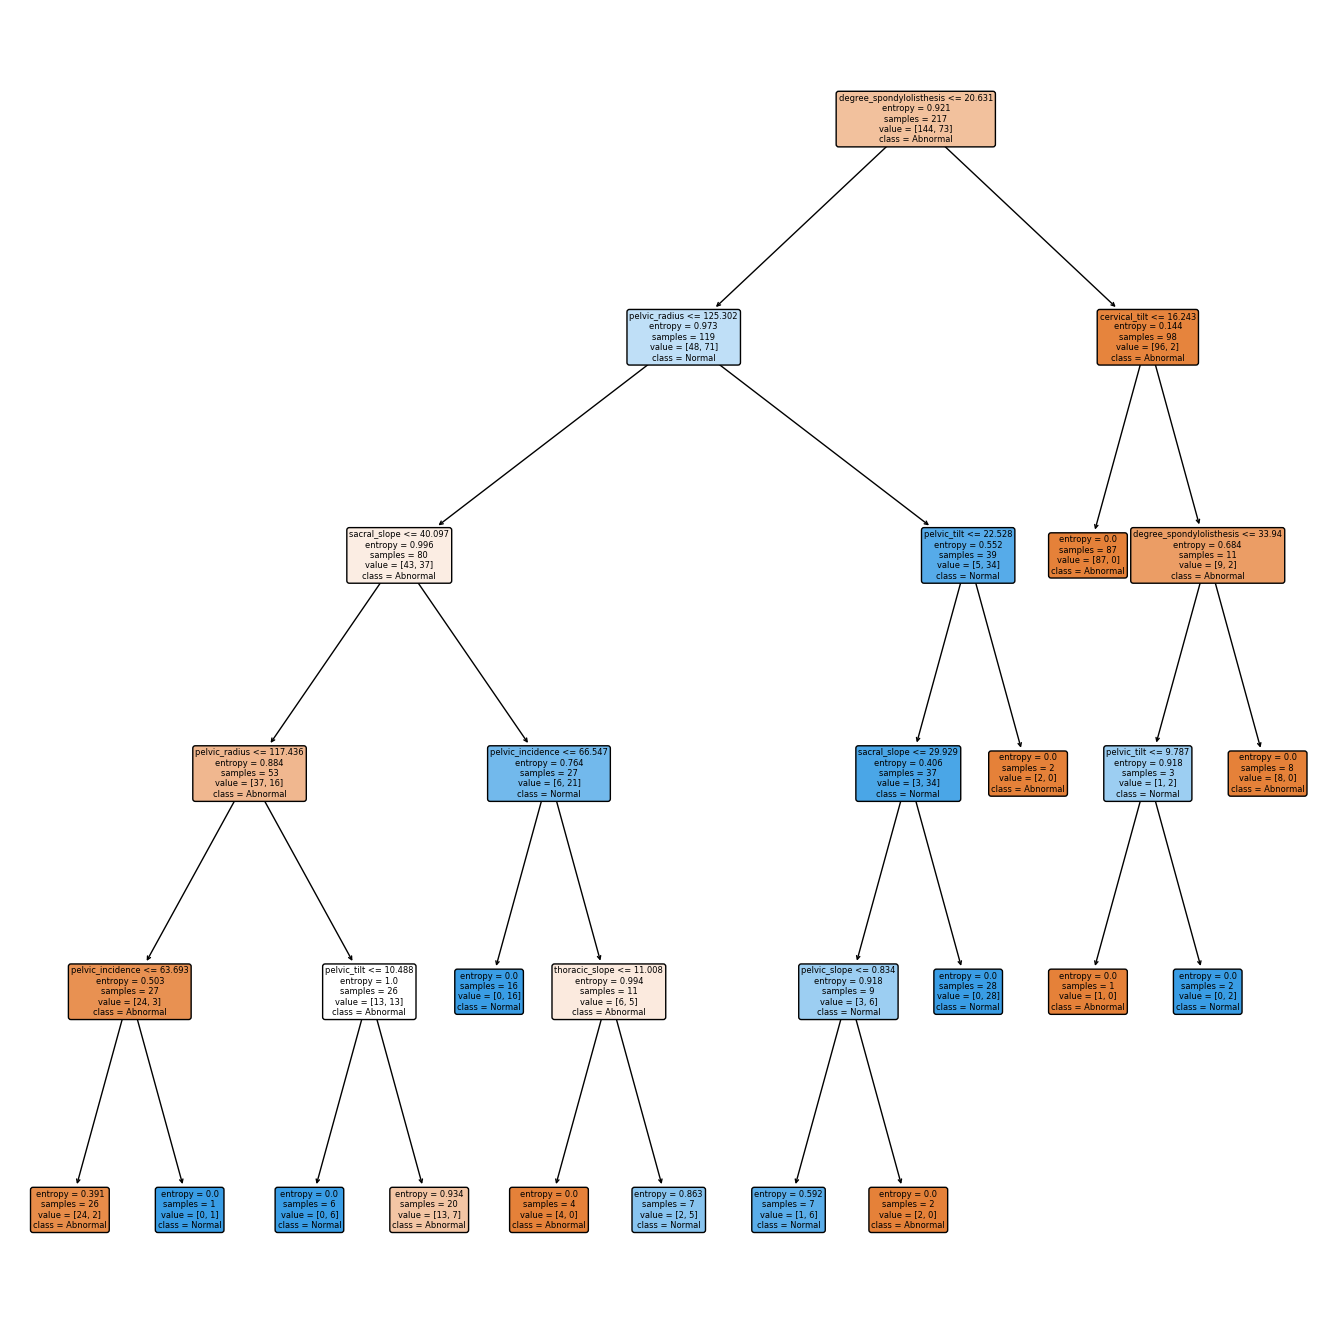

In [52]:
arbolOptimo = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=RANDOM_STATE)
arbolOptimo = arbolOptimo.fit(X_train, y_train)

plt.figure(figsize=(17,17))
plot_tree(arbolOptimo, filled=True,feature_names =data_cols ,class_names=["Abnormal", "Normal"], rounded=True, fontsize=6)
plt.show()

<Axes: >

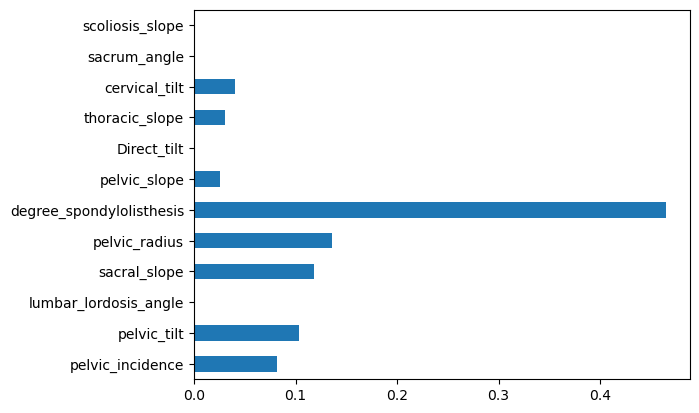

In [53]:
importances = pd.Series(arbolOptimo.feature_importances_, index=data_cols)
importances.plot(kind='barh')


- ¿Cuáles son las variables más importantes y en qué orden? 

    La primera es _degree_spondylolisthesis_ con mucha diferencia, seguida de _pelvic_radius_, _sacral_slope_, _pelvic_tilt_ y _pelvic_incidence_.
- ¿Hay variables del conjunto de datos que no se han usado? 

    Sí, _scoliosis_slope_, _sacrum_angle_, _direct_tilt_ y _lumbar_lordosis_angle_.
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 

    _Accuracy_ es el nº aciertos/nº predicciones. Partiendo de los 217 casos de entrenamiento, con solo una preguna se predicen 144 _Abnormal_ y 73 _Normal_, de los cuales los primeros son acertados en 96 ocasiones y los segundos 71, por lo que la operación queda 167/217 con un resultado de 0,77.

- ¿El árbol que has calculado es capaz de separar las clases? 

    Aunque acierta bastante, el error no es lo suficientemente pequeño como para considerarse preciso.

- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?

    No entendemos la pregunta, solo hay dos clases.

- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

    El primero, con una entropia de 0.99.


## 3.4) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [54]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, df_data, df_target, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.783670689162274
Exhaustividad ponderada media:  0.7709677419354838
F1 ponderado media:  0.7568775534304596


A continuación calculamos las métricas detalladas por clase.


In [55]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, df_data, df_target, cv=10)

# Informe por clases
cr = classification_report(df_target,predictions, target_names=["Abnormal", "Normal"])
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.83      0.84      0.83       210
      Normal       0.65      0.63      0.64       100

    accuracy                           0.77       310
   macro avg       0.74      0.73      0.74       310
weighted avg       0.77      0.77      0.77       310



A nuestro juicio, los datos son pobres tratándose de un tema tan importante como es el sector sanitario. La exhaustividad no es suficientemente buena en un contexto en el que vale más acertar que el dolor es lumbar a que no. Sin embargo, se podría utilizar para algún sistema de asignación de prioridad, no tanto como de diagnóstico. Si dejamos a un lado el contexto, no es tan mal modelo; de hecho, las puntuaciones f1 son bastante buenas.

Una ventaja es que nos da una ligera idea de la situación del paciente y de posibles dolores futuros. Como desventaja, en un marco real causaría bastante desconfianza o incluso rechazo, ya que un mal diagnóstico no solo desvía la atención del problema real, sino que puede ser catastrófico para el paciente. Un intermediario humano podría supervisar que dicho juicio es más o menos acertado, condicionando para bien la mayor parte de las veces dicha conclusión.

In [56]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[176  34]
 [ 37  63]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

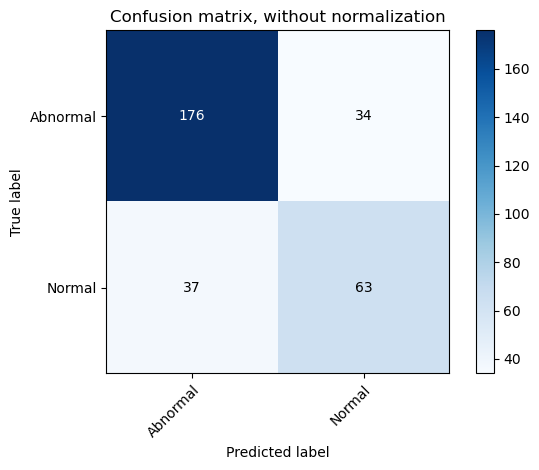

In [57]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(df_target, predictions, ["Abnormal", "Normal"], normalize=False)

El número de errores es muy parecido para ambos valores, aunque en proporción acierte más en _Abnormal_.

## 4) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

In [58]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


Como las variables no tienen una distribución normal, al estandarizar estaríamos perdiendo esa información, por lo que en este caso tiene más sentido normalizar y preservar así el contexto entre las mismas.

In [59]:
from sklearn.preprocessing import MinMaxScaler
aux_df = df.drop(columns=["Class_att"], axis=1)
# Normalizamos los datos escalándolos al intervalo [0,1]

data_scaled = MinMaxScaler().fit_transform(aux_df)

df_data_scaled = pd.DataFrame(data=data_scaled, index=aux_df.index, columns=aux_df.columns)
# df_target nos sigue valiendo al no ser una variable numérica
df_data_scaled.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952,0.471832,0.481023,0.490527,0.500764,0.502473,0.499235
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428,0.287048,0.290724,0.276710,0.295518,0.289298,0.279926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474,0.222123,0.202827,0.275105,0.256427,0.260246,0.272710
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133,0.474855,0.500730,0.480266,0.502859,0.488992,0.480109
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847,0.704722,0.737865,0.720461,0.749831,0.752264,0.722457
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Como la proporción de clases a predecir está desbalanceada (2/3 y 1/3) es importante
# usar la versión estratificada que mantiene la proporción de elementos de cada clase 
# al hacer la partición
# En este caso usamos el 80% de instancias como conjunto de entrenamiento y el 20% como
# conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(df_data_scaled, df_target, 
                                                    test_size=0.20, stratify=df_target,
                                                    random_state=RANDOM_STATE)

# Creamos el clasificador k-NN
# Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Medir la tasa de aciertos o exactitud (accuracy) en los conjuntos de entrenamiento y test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

train_accuracy, test_accuracy

(1.0, 0.7096774193548387)

Vamos a usar validación cruzada.

In [61]:
from sklearn.model_selection import cross_validate
import numpy as np

# Creamos el clasificador k-NN
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
# cross_validate usa validación estratificada para problemas de clasificación binaria o multiclase
scores = cross_validate(clf, df_data_scaled, df_target, scoring='accuracy', 
                        cv=10, return_train_score=False)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
scores

{'fit_time': array([0.00331664, 0.0018208 , 0.00257039, 0.00267673, 0.0020833 ,
        0.00140953, 0.00138021, 0.0017786 , 0.00134444, 0.00130558]),
 'score_time': array([0.00249338, 0.0021863 , 0.00257301, 0.00241303, 0.00192595,
        0.00143933, 0.00197601, 0.0015285 , 0.00143552, 0.00145483]),
 'test_score': array([0.35483871, 0.4516129 , 0.5483871 , 0.80645161, 0.58064516,
        0.70967742, 0.80645161, 0.64516129, 0.67741935, 0.87096774])}

In [62]:
print('Accuracy mean:', np.mean(scores['test_score']))
print('Accuracy std:', np.std(scores['test_score']))

Accuracy mean: 0.6451612903225807
Accuracy std: 0.15604369835416546


Iteramos sobre varios valores de k para encontrar el óptimo.

In [63]:
accuracy_mean = []
accuracy_std = []

k_values = range(1,15)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, df_data_scaled, df_target, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))
    
accuracy_mean

[0.5935483870967743,
 0.5935483870967743,
 0.6451612903225807,
 0.6258064516129033,
 0.6741935483870969,
 0.6645161290322582,
 0.6903225806451614,
 0.6967741935483872,
 0.7193548387096775,
 0.6903225806451613,
 0.6967741935483872,
 0.6935483870967742,
 0.7032258064516129,
 0.6967741935483872]

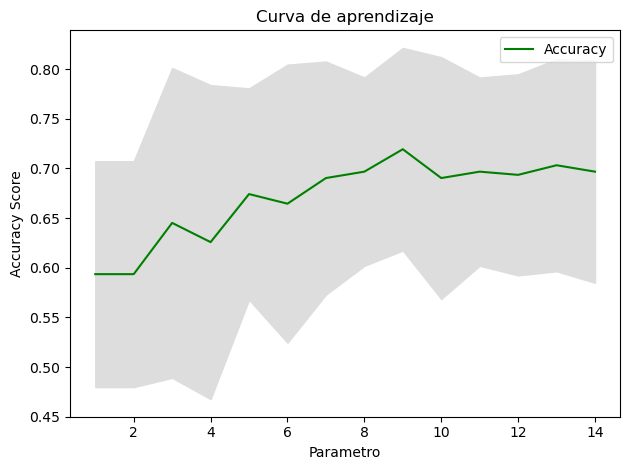

In [64]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

El k que seleccionamos es 9.

In [65]:
clf = KNeighborsClassifier(n_neighbors=9, weights='distance')

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Medir la tasa de aciertos o exactitud (accuracy) en los conjuntos de entrenamiento y test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

train_accuracy, test_accuracy

(1.0, 0.7580645161290323)

In [66]:
scores = cross_validate(clf, df_data_scaled, df_target, scoring='accuracy', 
                        cv=10, return_train_score=False)
scores

{'fit_time': array([0.00285769, 0.00213909, 0.00162911, 0.00211453, 0.00142765,
        0.00183463, 0.00177813, 0.00138378, 0.00266075, 0.00128484]),
 'score_time': array([0.003304  , 0.00185156, 0.00199723, 0.00185323, 0.00209904,
        0.00217247, 0.00174189, 0.00190568, 0.00173426, 0.00141311]),
 'test_score': array([0.58064516, 0.5483871 , 0.70967742, 0.77419355, 0.67741935,
        0.80645161, 0.83870968, 0.74193548, 0.64516129, 0.87096774])}

Dibujamos la matrix de confusión para tener mejor perspectiva de la clasificación.

Confusion matrix, without normalization
[[36  6]
 [ 9 11]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

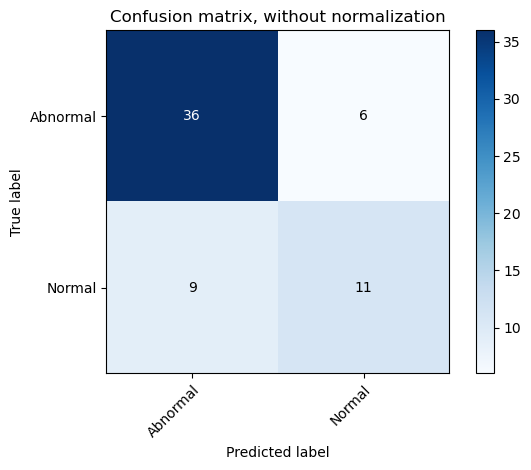

In [67]:
y_test_predicted =clf.predict(X_test)
plot_confusion_matrix(y_test, y_test_predicted, ["Abnormal", "Normal"], normalize=False)

Las predicciones siguen siendo algo pobres, con casi la mitad del conjunto de _Normal_ siendo clasificado como _Abnormal_.

## 5) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


Vamos a usar los datos escalados del apartado anterior, __df_data_scaled__. 

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

accuracy_mean = []
accuracy_std = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_validate(mlp, df_data_scaled, df_target, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: 

[0.8096774193548388,
 0.8064516129032258,
 0.7838709677419355,
 0.7580645161290323,
 0.7354838709677419,
 0.7161290322580646,
 0.7032258064516129,
 0.7032258064516129,
 0.7000000000000001,
 0.703225806451613]

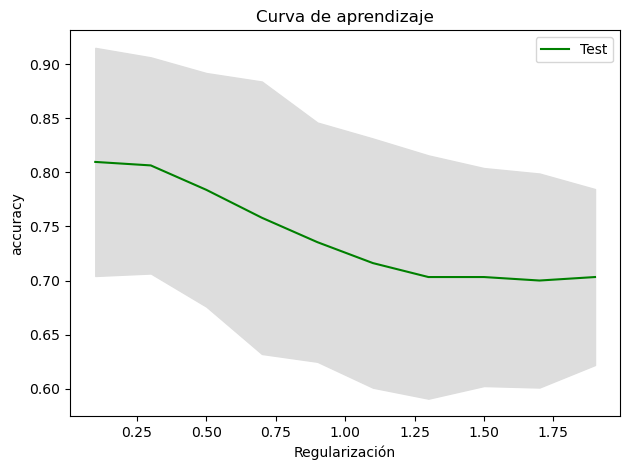

In [69]:
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

El mejor valor (mayor accuraccy) es con $\alpha=0.1$

In [70]:
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.1, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, df_data_scaled, df_target, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: 

{'fit_time': array([0.75695086, 0.70715332, 0.70720291, 0.68259025, 0.69929814,
        0.71379185, 0.7198472 , 0.70312405, 0.70178843, 0.71382427]),
 'score_time': array([0.00349498, 0.00318551, 0.00537467, 0.00343823, 0.00379777,
        0.00334477, 0.00443053, 0.00401831, 0.00394201, 0.00482368]),
 'test_precision_weighted': array([0.73244782, 0.65627541, 0.82862903, 0.73176718, 0.90257413,
        0.87131837, 0.90257413, 0.91532258, 0.84101382, 0.90257413]),
 'test_recall_weighted': array([0.64516129, 0.61290323, 0.77419355, 0.74193548, 0.90322581,
        0.87096774, 0.90322581, 0.90322581, 0.83870968, 0.90322581]),
 'test_f1_weighted': array([0.65567503, 0.62478778, 0.781517  , 0.73346367, 0.9018044 ,
        0.86673183, 0.9018044 , 0.89791271, 0.82985452, 0.9018044 ])}

In [71]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8284496608154928
Exhaustividad ponderada media:  0.8096774193548388
F1 ponderado media:  0.8095355741383813


In [72]:
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.1, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, df_data_scaled, df_target, cv=10)

# Informe por clases
cr = classification_report(df_target, predictions, target_names=['Abnormal', 'Normal'])
print(cr)

/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: 

              precision    recall  f1-score   support

    Abnormal       0.86      0.85      0.86       210
      Normal       0.70      0.72      0.71       100

    accuracy                           0.81       310
   macro avg       0.78      0.79      0.78       310
weighted avg       0.81      0.81      0.81       310



/usr/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Con esta tabla comprobamos que el modelo trabaja con más efectividad con la clase "Abnromal" que con la clase "Normal", aunque en ambos casos el f1 es bajo.